In [230]:
# Requirements
!pip install numpy matplotlib scipy

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
import matplotlib.patches as patches
import scipy.misc
import skimage.transform

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 18})

In [233]:
ls

drive/  sample_data/


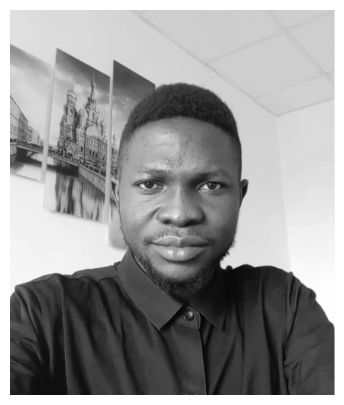

In [234]:
# Work with images

A = imread(os.path.join('sample_data/','profileisu.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale
#X = A;

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

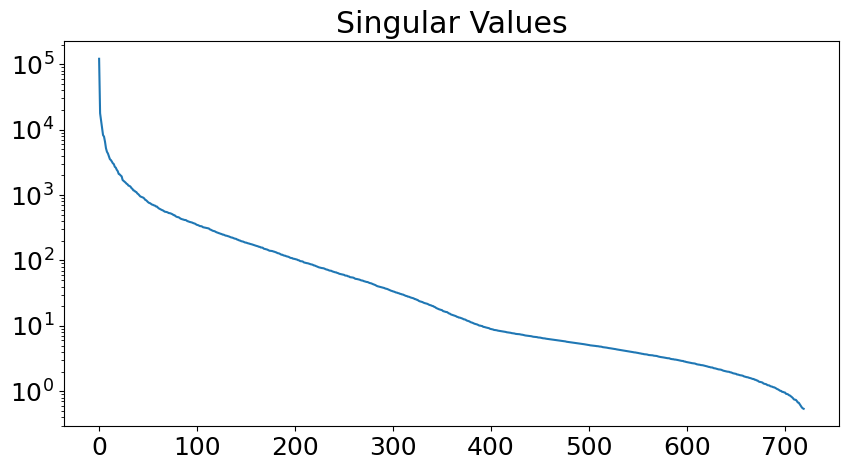

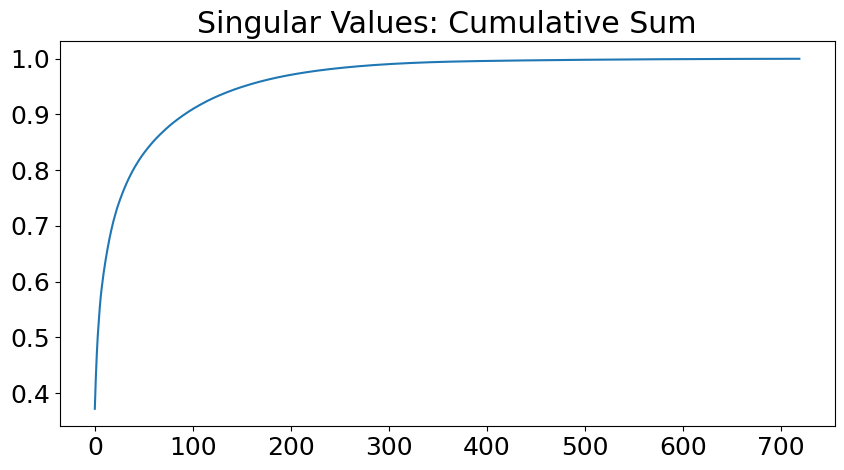

In [235]:
# SVD and singular values analysis

U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

r (energy 90%): 1
r (Gavish-Donoho): 283


(np.float64(-0.5), np.float64(719.5), np.float64(853.5), np.float64(-0.5))

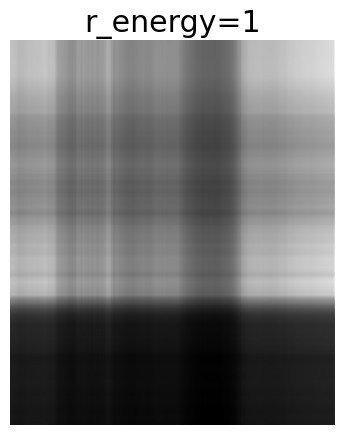

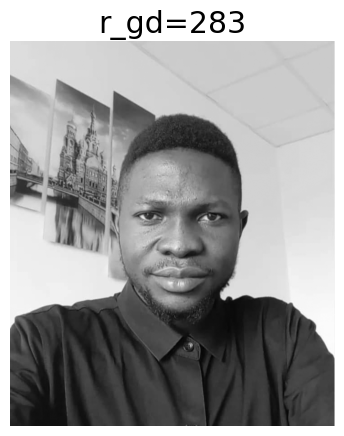

In [236]:
# after U, s_vector, VT = np.linalg.svd(X, full_matrices=False):
U, s_vec, VT = np.linalg.svd(X, full_matrices=False)   # s_vec is vector of singular values
Sdiag = np.diag(s_vec)

# Method A: energy threshold
energy = np.cumsum(s_vec**2) / np.sum(s_vec**2)
tau = 0.90
r_energy = int(np.searchsorted(energy, tau) + 1)  # +1 to include that singular value
print("r (energy 90%):", r_energy)

X_approx_energy = (U[:, :r_energy] @ np.diag(s_vec[:r_energy]) @ VT[:r_energy, :])

# Method B: Gavish-Donoho optimal hard threshold (if sigma known or estimated)
# If noise sigma unknown, estimate from median singular value assuming bulk is noise.
m, n = X.shape
beta = m / n
# Use formula tau = (4/np.sqrt(3)) * sigma * np.sqrt(n)  (common form)
# Estimate sigma from median singular value (robust heuristic):
sigma_est = np.median(s_vec) / np.sqrt(0.6745) / np.sqrt(n)  # heuristic - adapt if needed
tau = (4/np.sqrt(3)) * sigma_est * np.sqrt(n)
r_gd = np.sum(s_vec > tau)
print("r (Gavish-Donoho):", r_gd)

X_approx_gd = U[:, :r_gd] @ np.diag(s_vec[:r_gd]) @ VT[:r_gd, :]

# Display results:
plt.figure(); plt.imshow(X_approx_energy, cmap='gray'); plt.title(f'r_energy={r_energy}'); plt.axis('off')
plt.figure(); plt.imshow(X_approx_gd, cmap='gray'); plt.title(f'r_gd={r_gd}'); plt.axis('off')


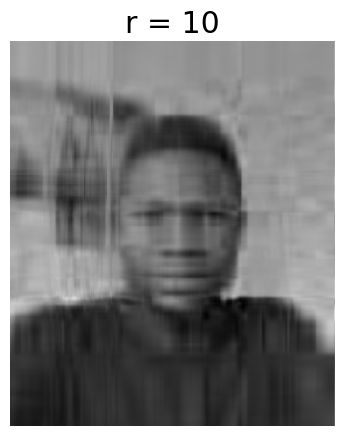

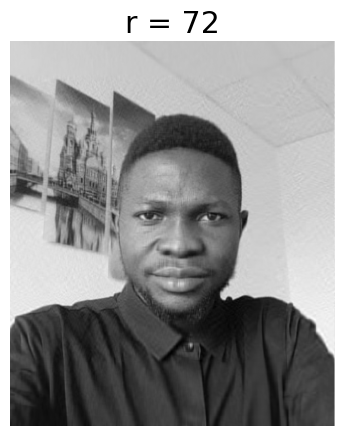

In [237]:
# Task 1
# Complete the code to recover initial image from truncated SVD
# Define truncation from two methods: cut-below threshold and based on importance metrics

# modify code here
r1 = 10 # ad-hoc: implement SV threshold or cumulative sum truncation formulas here
r2 = 72 # optimal: implement importance metric truncation formulas here

Xapprox1 = U[:,:r1] @ S[:r1,:r1] @ VT[:r1,:] # modify to use reduced-rank SVD
Xapprox2 = U[:,:r2] @ S[:r2,:r2] @ VT[:r2,:] # modify to use reduced-rank SVD

# output image
img = plt.imshow(Xapprox1)
img.set_cmap('gray')
plt.axis('off')
plt.title('r = ' + str(r1))
plt.show()

# output image
img = plt.imshow(Xapprox2)
img.set_cmap('gray')
plt.axis('off')
plt.title('r = ' + str(r2))
plt.show()


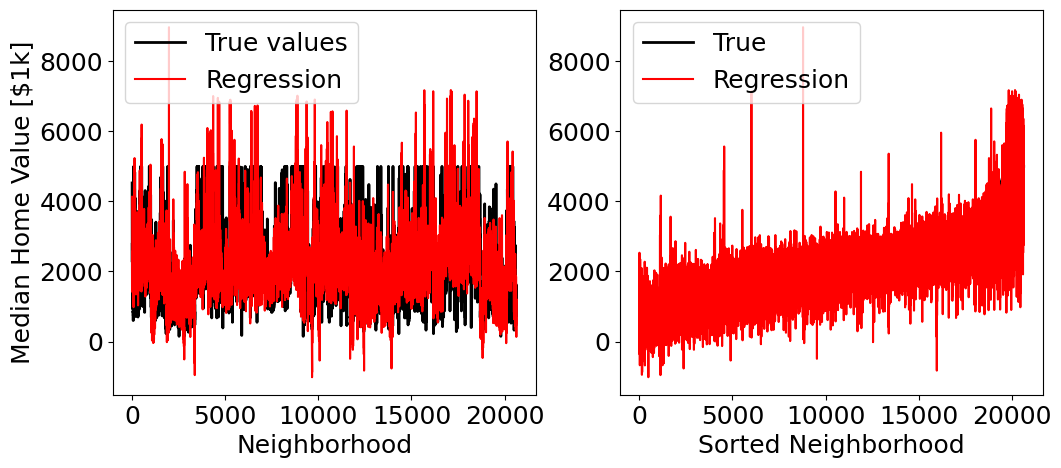

In [238]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

# Load California housing dataset
data = fetch_california_housing()
A = data.data          # Features
b = data.target * 1000 # Convert to same scale as original lab ($1000s)

# Pad with ones for bias term
A = np.pad(A, [(0,0),(0,1)], mode='constant', constant_values=1)

# Solve Ax = b using SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# Plot regression vs true values
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
plt.plot(b, 'k', linewidth=2, label='True values')
plt.plot(A @ x, 'r-', linewidth=1.5, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

# Sorted view
ax2 = fig.add_subplot(122)
sort_ind = np.argsort(b)
plt.plot(np.sort(b), 'k', linewidth=2, label='True')
plt.plot((A @ x)[sort_ind], 'r-', linewidth=1.5, label='Regression')
plt.xlabel('Sorted Neighborhood')
plt.legend()
plt.show()


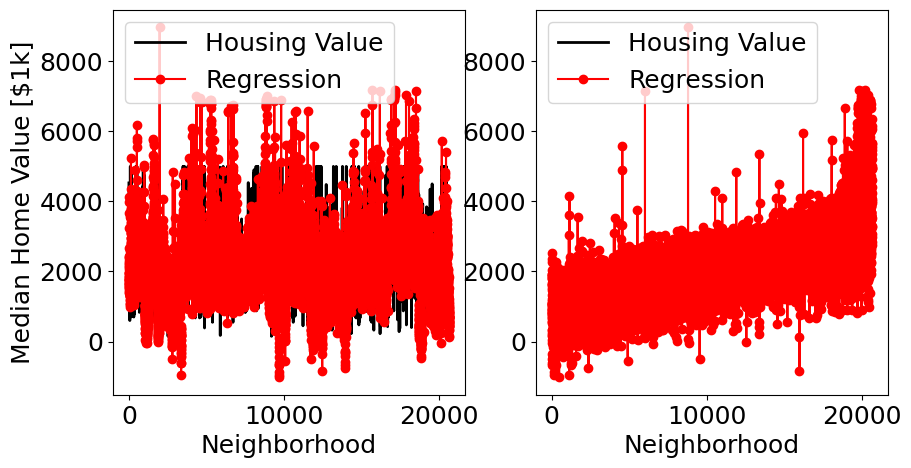

In [239]:
# Load dataset
H = np.column_stack((data.data, data.target * 1000))  # convert target to $1000s to match lab scale

#H = np.loadtxt(os.path.join('/content/drive/My Drive/MLR_DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, c='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', c='r', linewidth=1.5, markersize=6, label='Regression')


plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(b, c='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', c='r', linewidth=1.5, markersize=6, label='Regression')


plt.xlabel('Neighborhood')
plt.legend()

plt.show()

In [240]:
# Task 2
# Split housing prices dataset to training and test parts
# Estimate regresson from the training subset and validate on the testing one
# Plot validation results



Train RMSE: 1103.7700728554803
Test  RMSE: 1090.0033546418701
Test  R2: 0.08977713754750183


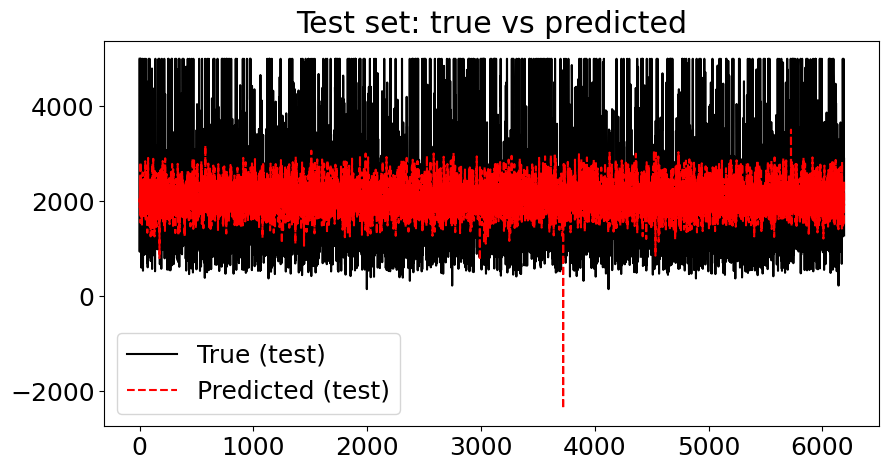

In [241]:
# Task 2

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# A (features) already padded with ones column as intercept; b is target
A_full = A.copy()
b_full = b.copy()

A_train, A_test, b_train, b_test = train_test_split(A_full, b_full, test_size=0.3, random_state=42)

U, s_vec, VT = np.linalg.svd(A_train, full_matrices=False)
x_train = VT.T @ (np.linalg.inv(np.diag(s_vec)) @ (U.T @ b_train))

b_pred_train = A_train @ x_train
b_pred_test = A_test @ x_train

print("Train RMSE:", np.sqrt(mean_squared_error(b_train, b_pred_train)))
print("Test  RMSE:", np.sqrt(mean_squared_error(b_test, b_pred_test)))
print("Test  R2:", r2_score(b_test, b_pred_test))

# Plots
plt.figure()
plt.plot(b_test, 'k-', label='True (test)')
plt.plot(b_pred_test, 'r--', label='Predicted (test)')
plt.legend()
plt.title('Test set: true vs predicted')
plt.show()


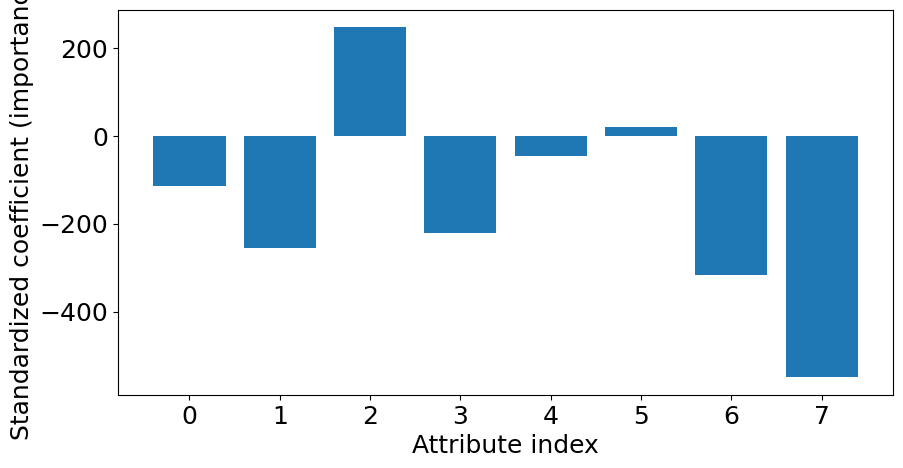

In [242]:
A2 = A.copy()                # avoid aliasing
# last column is intercept (ones)
feature_cols = A2.shape[1] - 1

# subtract mean and divide by std for each feature column
means = A2[:, :feature_cols].mean(axis=0)
stds  = A2[:, :feature_cols].std(axis=0)
stds[stds == 0] = 1.0        # avoid division by zero

A2[:, :feature_cols] = (A2[:, :feature_cols] - means) / stds
A2[:, -1] = 1.0              # intercept remains ones

U, s_vec, VT = np.linalg.svd(A2, full_matrices=False)
x = VT.T @ (np.linalg.inv(np.diag(s_vec)) @ (U.T @ b))

# Plot coefficients (exclude intercept)
coef = x[:-1]
plt.bar(np.arange(len(coef)), coef)
plt.xlabel('Attribute index'); plt.ylabel('Standardized coefficient (importance)')
plt.show()


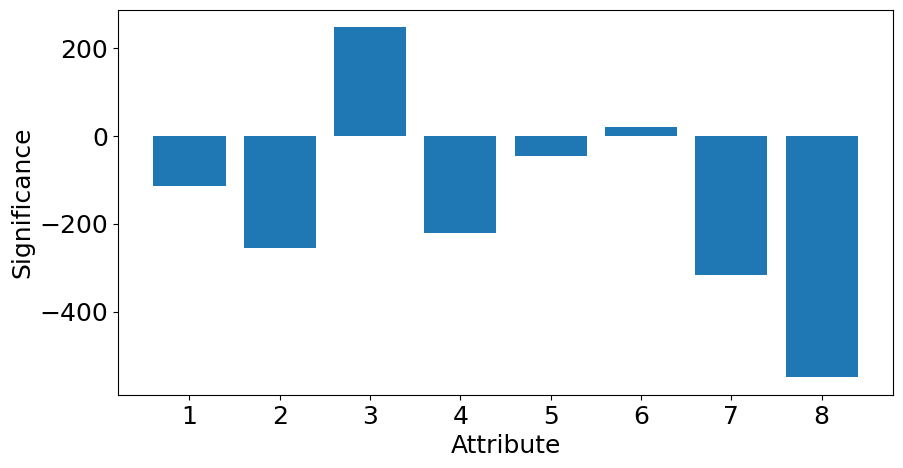

In [243]:
# Discover significance (correlation) of different factors

# Task 3 - FIX ERROR - perform standartization of data

A2 = A # apply changes here

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

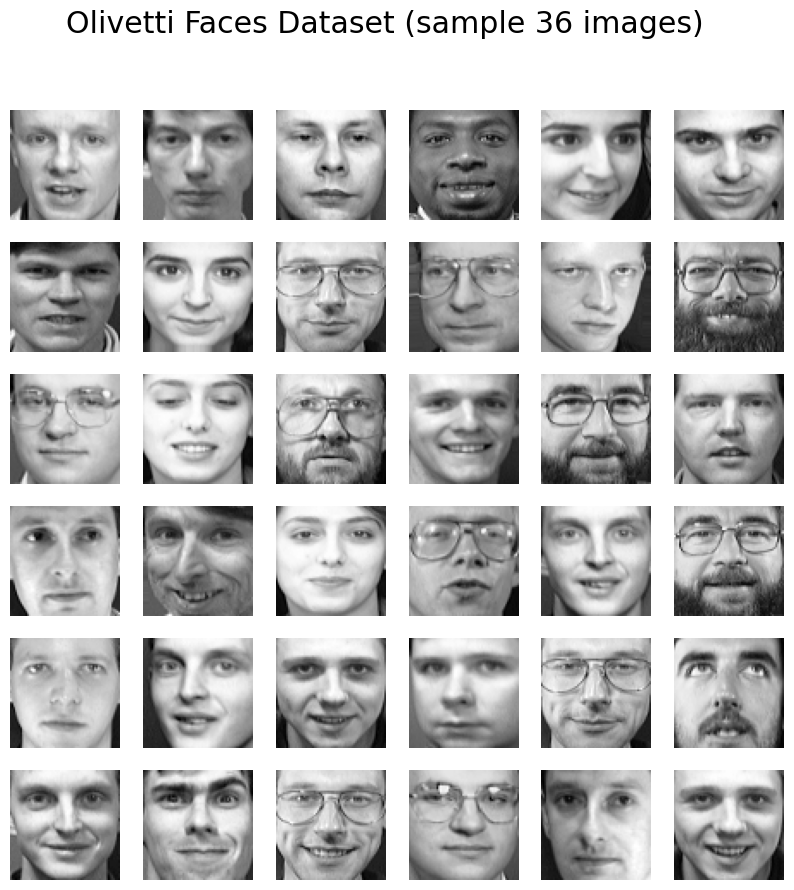

In [244]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np

# === Load Olivetti Faces dataset ===
data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = data.images  # shape = (400, 64, 64)
n_samples, m, n = faces.shape

# Flatten each image to match the lab structure (m*n, num_faces)
faces_matrix = faces.reshape(n_samples, -1).T  # (4096, 400)
nfaces = np.ones(n_samples, dtype=int)  # 1 face per person

# === Visualize a 6x6 grid of faces ===
cols, rows = 6, 6
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i], cmap='gray')
    ax.axis('off')
plt.suptitle("Olivetti Faces Dataset (sample 36 images)")
plt.show()


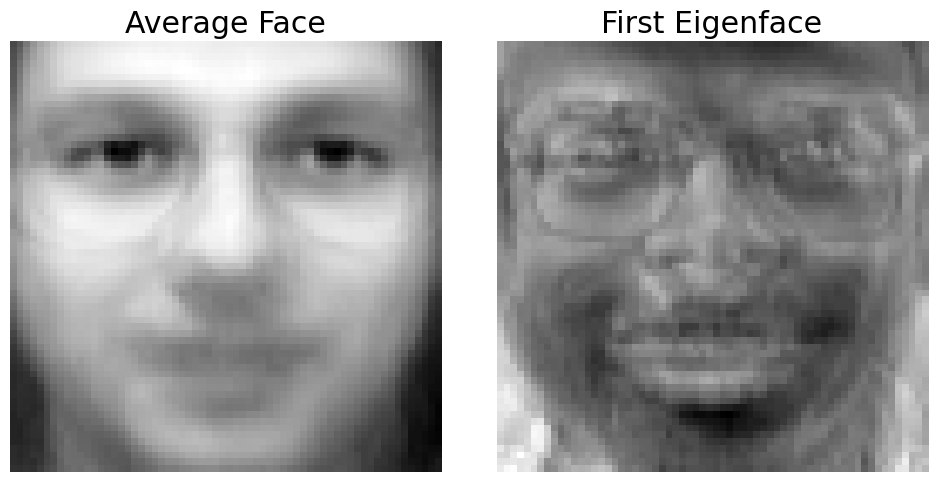

In [245]:

# Reshape to match original lab's structure: each column = one face
faces_matrix = faces.reshape(n_samples, m * n).T  # shape (4096, 400)

# Simulate nfaces (1 per person) for compatibility
nfaces = np.ones(n_samples, dtype=int)

# === Use the first 36 faces as "training" ===
trainingFaces = faces_matrix[:, :36]
avgFace = np.mean(trainingFaces, axis=1)  # size (m*n,)

# === Compute eigenfaces on mean-subtracted training data ===
X = trainingFaces - avgFace[:, np.newaxis]
U, S, VT = np.linalg.svd(X, full_matrices=False)

# === Plot the average face and first eigenface ===
fig1 = plt.figure(figsize=(10, 5))

# Average face
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(avgFace.reshape((m, n)), cmap='gray')
ax1.set_title("Average Face")
ax1.axis('off')

# First eigenface
ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(U[:, 0].reshape((m, n)), cmap='gray')
ax2.set_title("First Eigenface")
ax2.axis('off')

plt.tight_layout()
plt.show()

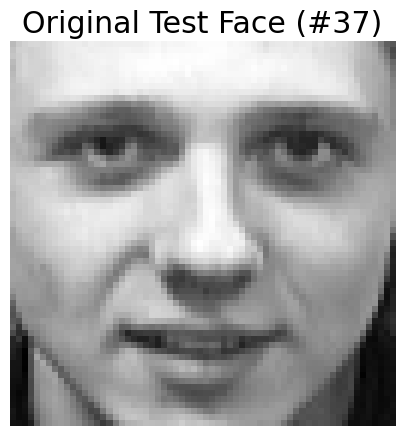

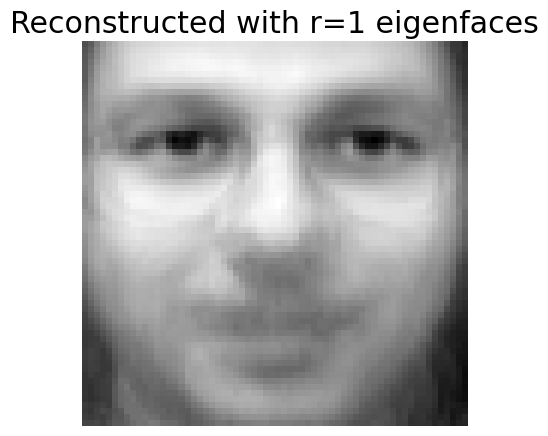

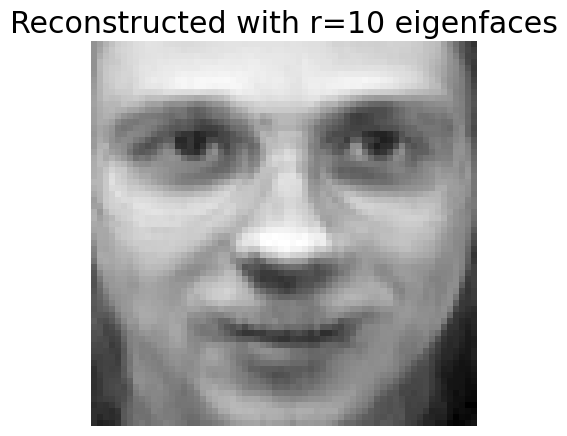

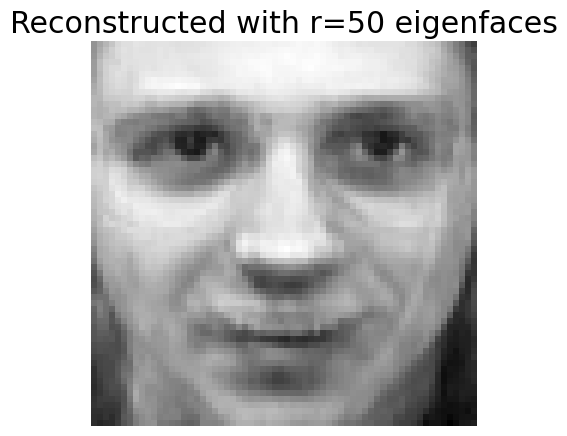

In [246]:

# === Use first 36 faces for training ===
trainingFaces = faces_matrix[:, :36]

# === Compute average face and SVD (eigenfaces) ===
avgFace = np.mean(trainingFaces, axis=1)
X = trainingFaces - avgFace[:, None]
U, S, VT = np.linalg.svd(X, full_matrices=False)

# === Select test face (the 37th image) ===
testFace = faces_matrix[:, 36]  # 0-indexed, so this is the "37th"
plt.imshow(testFace.reshape((m, n)), cmap='gray')
plt.title('Original Test Face (#37)')
plt.axis('off')
plt.show()

# === Mean-subtracted test face ===
testFaceMS = testFace - avgFace

# === Reconstruct using different numbers of eigenfaces ===
r_list = [1, 10, 50]

for r in r_list:
    Ur = U[:, :r]              # top-r eigenfaces
    coeffs = Ur.T @ testFaceMS # projection coefficients
    recon = avgFace + Ur @ coeffs  # reconstructed face

    plt.figure()
    plt.imshow(recon.reshape((m, n)), cmap='gray')
    plt.title(f"Reconstructed with r={r} eigenfaces")
    plt.axis('off')
    plt.show()

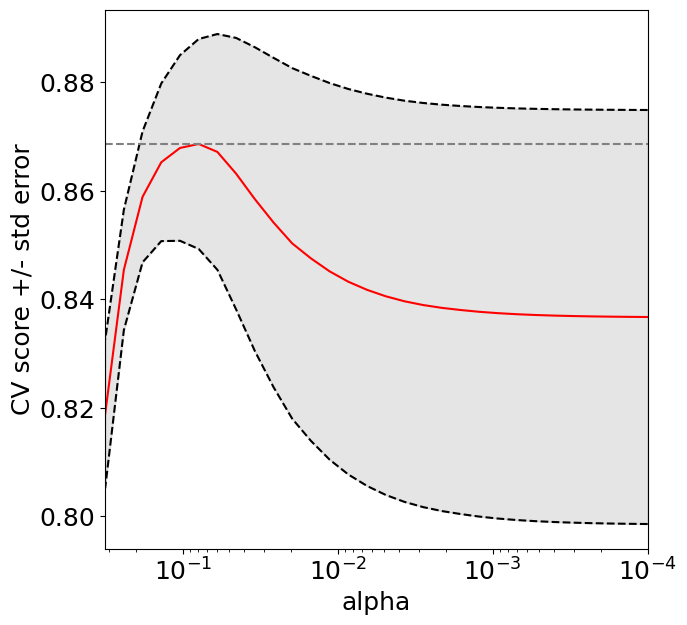

In [247]:
# LASSO algorithm

from sklearn import linear_model
from sklearn import model_selection

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 18})

A = np.random.randn(100,10) # Matrix of possible predictors
x = np.array([0, 0, 1, 0, 0, 0, -1, 0, 0, 0]) #Two nonzero predictors
b = A @ x + 0.5*np.random.randn(100)

xL2 = np.linalg.pinv(A) @ b

reg = linear_model.LassoCV(cv=10).fit(A, b)

lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]

clf = model_selection.GridSearchCV(lasso, tuned_parameters, cv=10, refit=False)
clf.fit(A, b)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores,'r-')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(10)

plt.semilogx(alphas, scores + std_error, 'k--')
plt.semilogx(alphas, scores - std_error, 'k--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.1,color='k')

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])

plt.show()

[ 0.03031955 -0.01261908  0.9511848  -0.0239502  -0.03633874  0.00751727
 -1.02998233 -0.02075485  0.00383059  0.02058089]
[ 0.          0.          0.87867074 -0.         -0.          0.
 -0.97075403 -0.         -0.          0.        ]
[ 0.94772144 -1.02636445]


/tmp/ipython-input-919676705.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


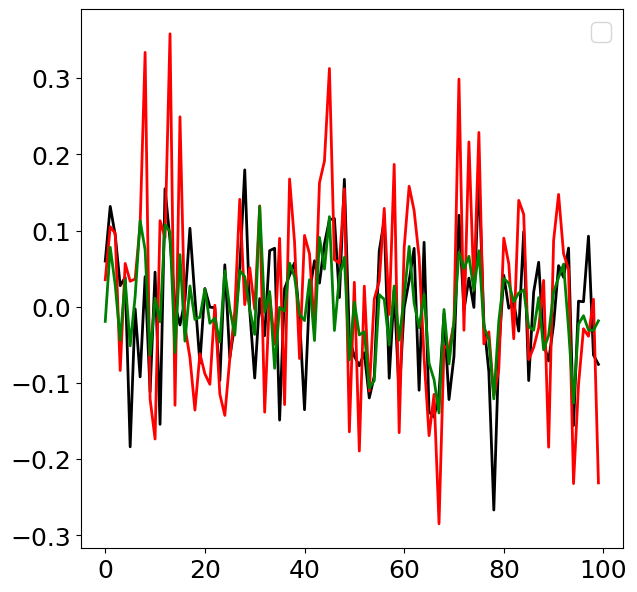

In [248]:
XL1 = linear_model.Lasso(alpha=clf.best_params_['alpha'])
XL1.fit(A,b)
xL1 = XL1.coef_
xL1DeBiased = np.linalg.pinv(A[:,np.abs(xL1)>0.1]) @ b

print(xL2)
print(xL1)
print(xL1DeBiased)

bL2 = A@xL2
bL1 = A@xL1
bL1u= A[:,np.abs(xL1)>0.1]@xL1DeBiased

plt.legend()

#ax2 = fig.add_subplot(123)

#plt.plot(A@x, c='b', linewidth=2, label='True')
plt.plot(A@x-bL2, c='k', linewidth=2, label='L2 optimal')
plt.plot(A@x-bL1, c='r', linewidth=2, label='LASSO')
plt.plot(A@x-bL1u, c='g', linewidth=2, label='LASSO Unbiased')

#plot.show()

=== Robust PCA on Olivetti Faces ===
Data shape: (4096, 400)
Running RPCA...
Iter   0: rel_error = 1.00e+00, mu = 1.78e-01
Iter   1: rel_error = 1.00e+00, mu = 2.66e-01
Iter   2: rel_error = 6.86e-01, mu = 4.00e-01
Iter   3: rel_error = 2.16e-01, mu = 5.99e-01
Iter   4: rel_error = 2.16e-01, mu = 8.99e-01
Iter   5: rel_error = 2.16e-01, mu = 1.35e+00
Iter   6: rel_error = 2.16e-01, mu = 2.02e+00
Iter   7: rel_error = 1.92e-01, mu = 3.03e+00
Iter   8: rel_error = 1.66e-01, mu = 4.55e+00
Iter   9: rel_error = 1.23e-01, mu = 6.83e+00
Iter  20: rel_error = 5.99e-04, mu = 5.91e+02
Iter  40: rel_error = 1.07e-07, mu = 1.96e+06
Converged at iteration 41 with error 7.32e-08
RPCA completed!
Low-rank component L shape: (4096, 100)
Sparse component S shape: (4096, 100)

=== Visualizing Results ===


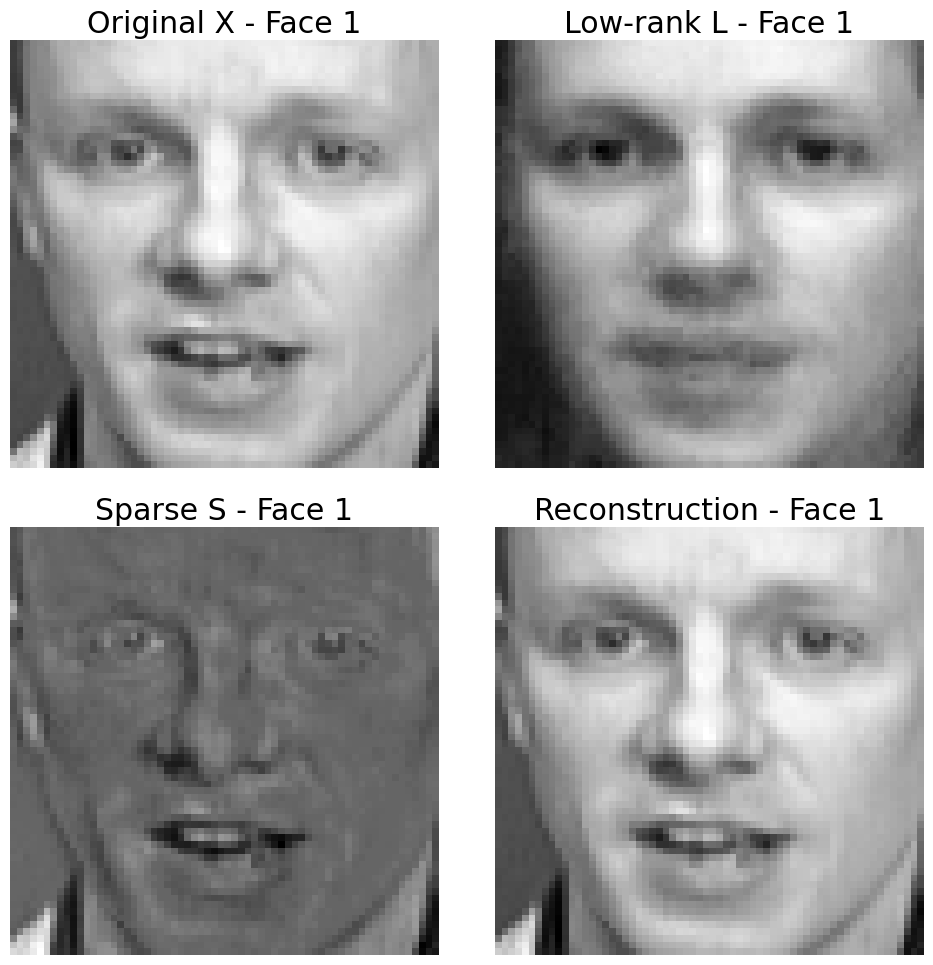

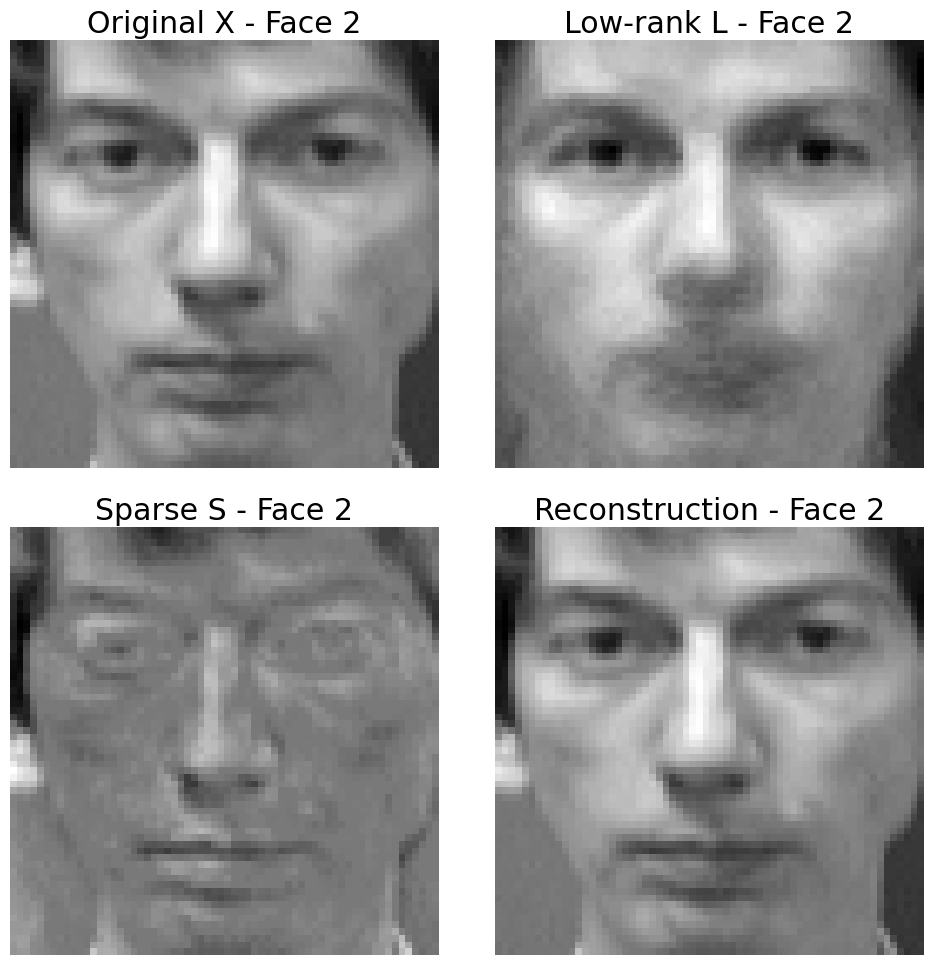

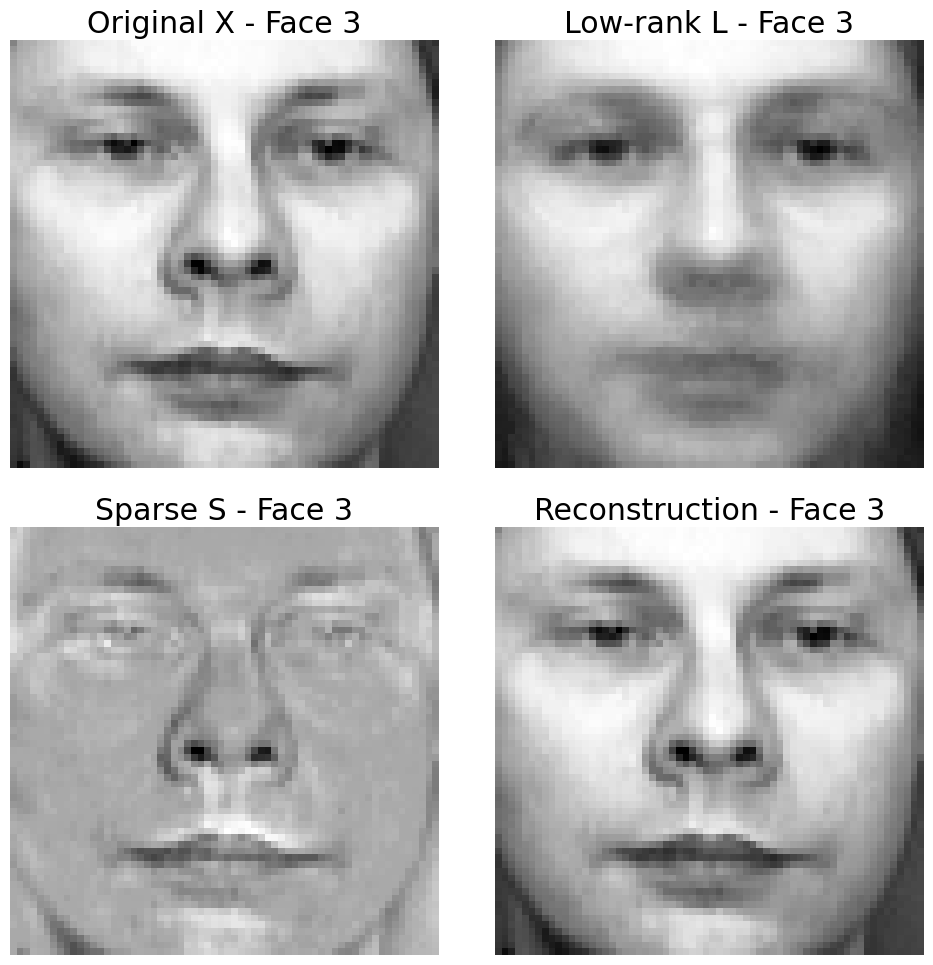

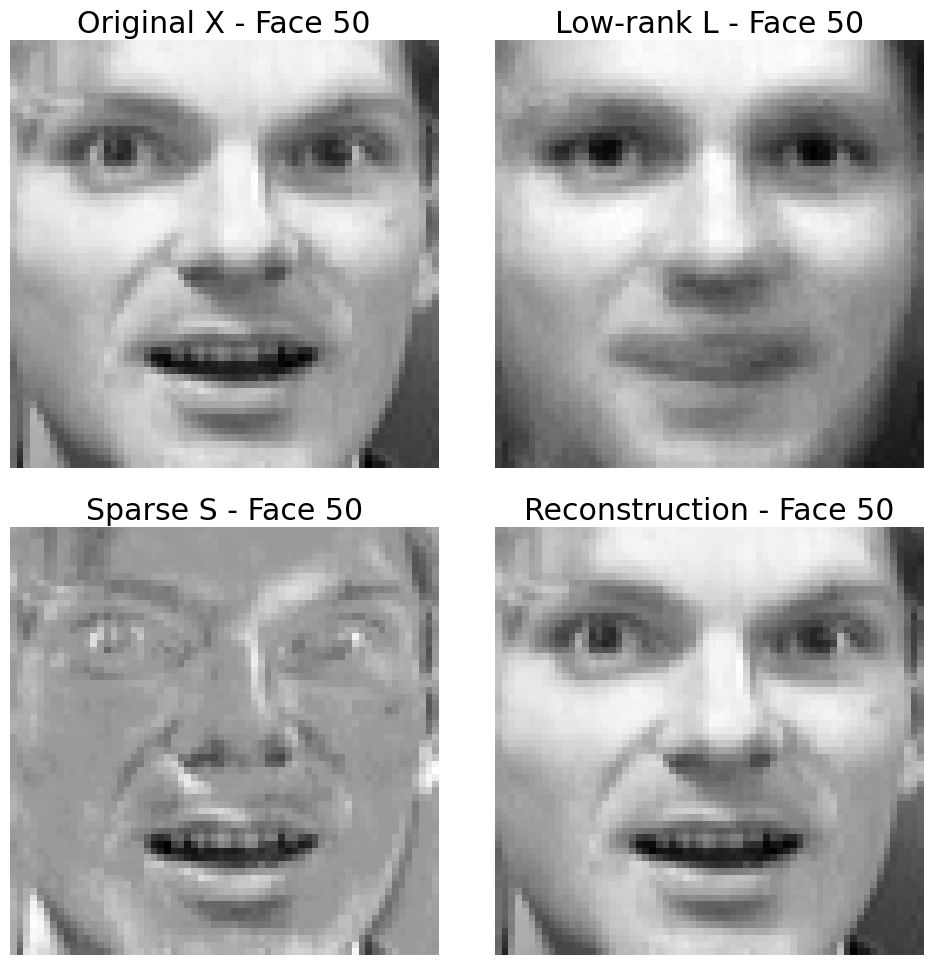


=== Analysis ===
Original data range: [0.000, 0.004]
Low-rank L range: [0.000, 0.004]
Sparse S range: [-0.002, 0.002]
Reconstruction error: 0.000000

Singular values of L (first 10): [1.41029209 0.13278379 0.08827603 0.06109747 0.05326755 0.04440629
 0.04119762 0.03719428 0.03634886 0.0291612 ]
Rank of L (non-zero singular values): 60
Sparsity of S (fraction of near-zero elements): 0.193


In [249]:
# Flatten each image to match the lab structure (m*n, num_faces)
faces_matrix = faces.reshape(n_samples, -1).T  # (4096, 400)
nfaces = np.ones(n_samples, dtype=int)  # 1 face per person

# Function Definitions
def shrink(X, tau):
    Y = np.abs(X) - tau
    return np.sign(X) * np.maximum(Y, np.zeros_like(Y))

def SVT(X, tau):
    U, S, VT = np.linalg.svd(X, full_matrices=0)
    out = U @ np.diag(shrink(S, tau)) @ VT
    return out

# Task 5 - Implement robust PCA algorithms
def RPCA(X, lam=None, mu=None, rho=1.5, max_iter=100, tol=1e-7, verbose=True):
    """
    Implement Robust PCA using Augmented Lagrange Multiplier (ALM) method
    Decomposes X = L + S, where L is low-rank and S is sparse
    """
    m, n = X.shape

    # Initialize parameters
    if lam is None:
        lam = 1.0 / np.sqrt(max(m, n))

    if mu is None:
        mu = 0.25 / np.linalg.norm(X, ord=2)  # 1/(4*||X||_2)

    # Initialize variables
    L = np.zeros_like(X)
    S = np.zeros_like(X)
    Y = np.zeros_like(X)  # Lagrange multiplier

    mu_max = 1e10
    norm_X = np.linalg.norm(X, 'fro')

    # ALM algorithm
    for iter in range(max_iter):
        # Update L (low-rank component) using Singular Value Thresholding
        L = SVT(X - S + (1/mu) * Y, 1/mu)

        # Update S (sparse component) using shrinkage operator
        S = shrink(X - L + (1/mu) * Y, lam/mu)

        # Update Lagrange multiplier
        Z = X - L - S  # Residual
        Y = Y + mu * Z

        # Check convergence
        rel_error = np.linalg.norm(Z, 'fro') / (norm_X + 1e-16)

        if verbose and (iter % 20 == 0 or iter < 10):
            print(f"Iter {iter:3d}: rel_error = {rel_error:.2e}, mu = {mu:.2e}")

        if rel_error < tol:
            if verbose:
                print(f"Converged at iteration {iter} with error {rel_error:.2e}")
            break

        # Update mu
        mu = min(rho * mu, mu_max)

    return L, S

# Test the implementation
print("=== Robust PCA on Olivetti Faces ===")
print(f"Data shape: {faces_matrix.shape}")

# Use only first 100 faces for faster computation
X = faces_matrix[:, :100].astype(float)

# Normalize data to [0, 1] range
X = X / 255.0

print("Running RPCA...")
L, S = RPCA(X, verbose=True)

print("RPCA completed!")
print(f"Low-rank component L shape: {L.shape}")
print(f"Sparse component S shape: {S.shape}")

# Visualize results
print("\n=== Visualizing Results ===")
inds = [0, 1, 2, 49]  # First 3 and 50th image

for k in inds:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.reshape(-1)

    # Reshape back to image dimensions (64, 64)
    img_dims = (64, 64)

    # Original image
    axs[0].imshow(np.reshape(X[:, k], img_dims), cmap='gray')
    axs[0].set_title(f'Original X - Face {k+1}')
    axs[0].axis('off')

    # Low-rank component
    axs[1].imshow(np.reshape(L[:, k], img_dims), cmap='gray')
    axs[1].set_title(f'Low-rank L - Face {k+1}')
    axs[1].axis('off')

    # Sparse component
    axs[2].imshow(np.reshape(S[:, k], img_dims), cmap='gray')
    axs[2].set_title(f'Sparse S - Face {k+1}')
    axs[2].axis('off')

    # Reconstruction (L + S)
    axs[3].imshow(np.reshape(L[:, k] + S[:, k], img_dims), cmap='gray')
    axs[3].set_title(f'Reconstruction - Face {k+1}')
    axs[3].axis('off')

    plt.tight_layout()
    plt.show()

# Additional analysis
print("\n=== Analysis ===")
print(f"Original data range: [{X.min():.3f}, {X.max():.3f}]")
print(f"Low-rank L range: [{L.min():.3f}, {L.max():.3f}]")
print(f"Sparse S range: [{S.min():.3f}, {S.max():.3f}]")
print(f"Reconstruction error: {np.linalg.norm(X - L - S, 'fro'):.6f}")

# Check the low-rank property
U, s_L, VT = np.linalg.svd(L, full_matrices=False)
print(f"\nSingular values of L (first 10): {s_L[:10]}")
print(f"Rank of L (non-zero singular values): {np.sum(s_L > 1e-10)}")

# Check sparsity of S
sparsity = np.sum(np.abs(S) < 1e-6) / S.size
print(f"Sparsity of S (fraction of near-zero elements): {sparsity:.3f}")

nfaces[0] = 1
Total available faces: 400
X shape: (4096, 100)
L shape: (4096, 100)
S shape: (4096, 100)


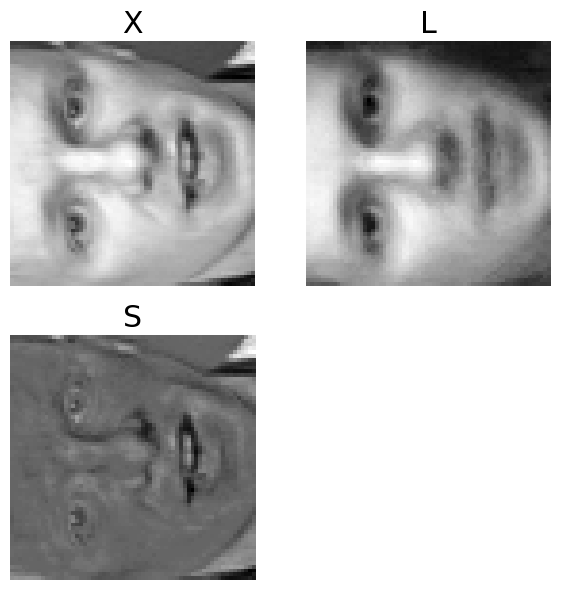

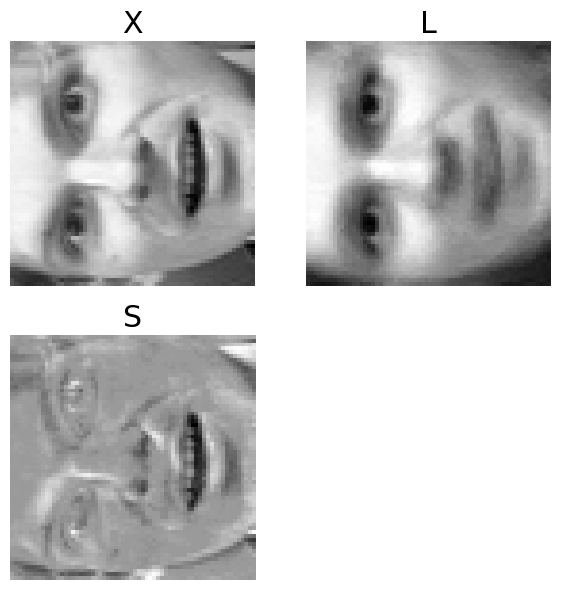

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Load Olivetti Faces
data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = data.images  # (400, 64, 64)
n_samples = faces.shape[0]

# Flatten for RPCA
faces_matrix = faces.reshape(n_samples, -1).T  # (4096, 400)
nfaces = np.ones(n_samples, dtype=int)

# RPCA functions
def shrink(X,tau):
    Y = np.abs(X)-tau
    return np.sign(X) * np.maximum(Y,np.zeros_like(Y))

def SVT(X,tau):
    U,S,VT = np.linalg.svd(X,full_matrices=0)
    out = U @ np.diag(shrink(S,tau)) @ VT
    return out

def RPCA(X, lam=None, mu=None, rho=1.5, max_iter=100, tol=1e-7):
    m, n = X.shape
    if lam is None: lam = 1.0 / np.sqrt(max(m, n))
    if mu is None: mu = 0.25 / np.linalg.norm(X, ord=2)

    L = np.zeros_like(X)
    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    mu_max = 1e10
    norm_X = np.linalg.norm(X, 'fro')

    for iter in range(max_iter):
        L = SVT(X - S + (1/mu) * Y, 1/mu)
        S = shrink(X - L + (1/mu) * Y, lam/mu)
        Z = X - L - S
        Y = Y + mu * Z

        if np.linalg.norm(Z, 'fro') / norm_X < tol:
            break
        mu = min(rho * mu, mu_max)

    return L, S

# FIX: Use more images for X (not just nfaces[0] which is 1)
print(f"nfaces[0] = {nfaces[0]}")  # This is 1
print(f"Total available faces: {faces_matrix.shape[1]}")

# Use first 100 faces instead of just nfaces[0]
X = faces_matrix[:, :100]  # Use first 100 faces
L, S = RPCA(X)

print(f"X shape: {X.shape}")
print(f"L shape: {L.shape}")
print(f"S shape: {S.shape}")

inds = (1,50)

for k in inds:
    fig,axs = plt.subplots(2,2)
    axs = axs.reshape(-1)
    # Use correct dimensions for Olivetti (64,64) instead of (168,192)
    axs[0].imshow(np.reshape(X[:,k-1],(64,64)).T,cmap='gray')
    axs[0].set_title('X')
    axs[1].imshow(np.reshape(L[:,k-1],(64,64)).T,cmap='gray')
    axs[1].set_title('L')
    axs[2].imshow(np.reshape(S[:,k-1],(64,64)).T,cmap='gray')
    axs[2].set_title('S')
    for ax in axs:
        ax.axis('off')
    plt.show()

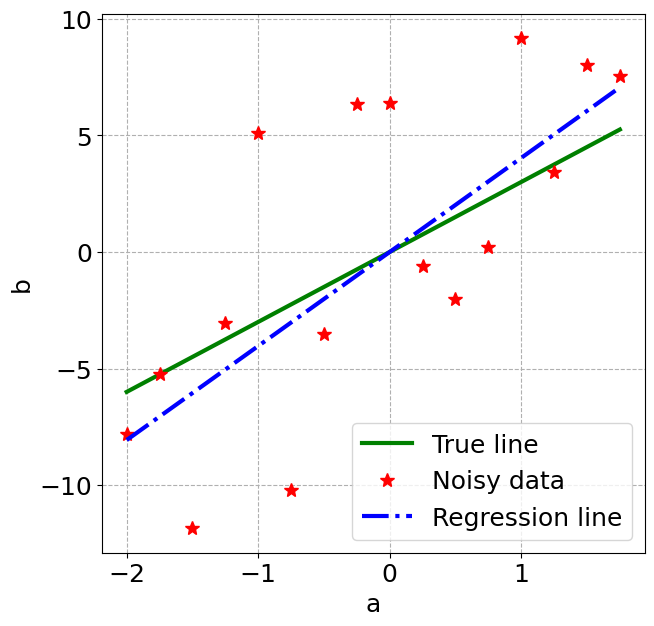

In [251]:
# Work with noisy data

x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + 5*np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, c='g', linewidth=3, label='True line') # True relationship
plt.plot(a, b, '*', c='r', markersize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a,'-.', c='b', linewidth=3, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

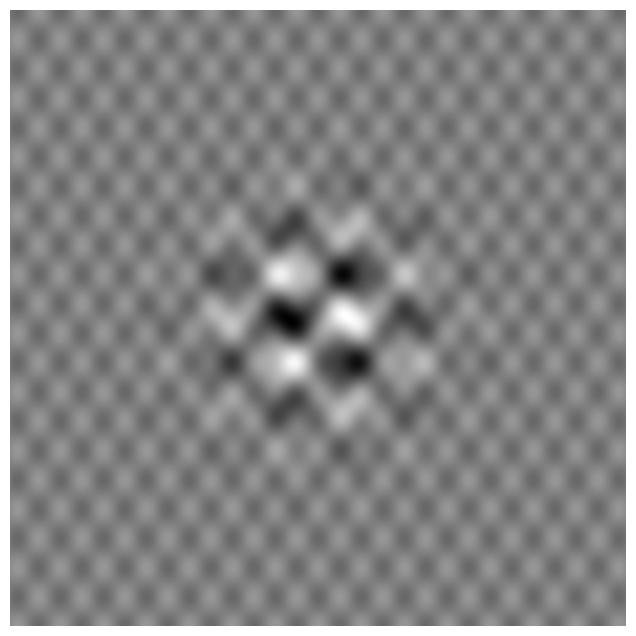

In [252]:
# Optimal trunctaion for noisy data

plt.rcParams['figure.figsize'] = [8, 8]

t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(7*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[3, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(15*t)]).T

X = Utrue @ Strue @ Vtrue.T

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

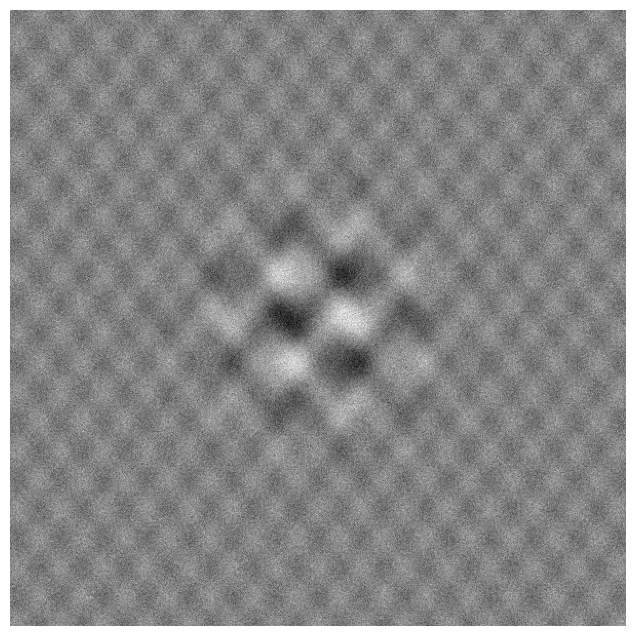

(600, 600)


In [253]:
# Adding noise to data
sigma = 0.5
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

print(Xnoisy.shape)

398


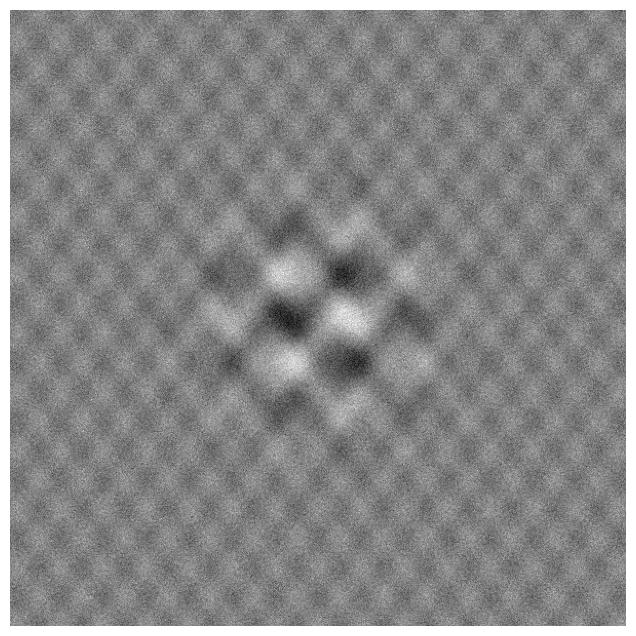

In [254]:
# Reconstructing data from SVD made on noisy measurements

U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]

# Ad-hoc truncation from cumulative sum

cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.9)) # Find r to capture 90% energy

print(r90)

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
plt.imshow(X90)
plt.set_cmap('gray')
plt.axis('off')
plt.show()


cutoff: 28.284271247461906 r_opt: 2
28.284271247461906
1


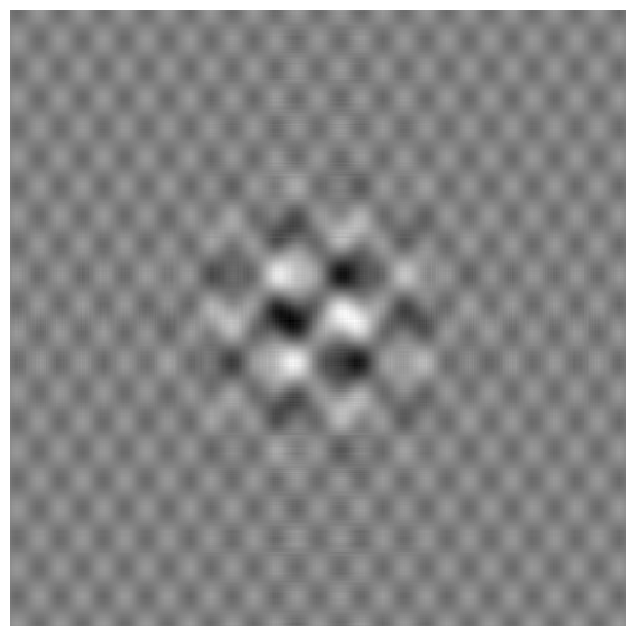

In [255]:
#task here
U, s_vec, VT = np.linalg.svd(Xnoisy, full_matrices=False)
N = Xnoisy.shape[0]
sigma = 0.5  # known in your experiment
cutoff = (4/np.sqrt(3)) * sigma * np.sqrt(N)
r_opt = np.sum(s_vec > cutoff)
print("cutoff:", cutoff, "r_opt:", r_opt)

Xclean = U[:, :r_opt] @ np.diag(s_vec[:r_opt]) @ VT[:r_opt, :]
plt.imshow(Xclean, cmap='gray'); plt.axis('off')

cutoff = (4/np.sqrt(3)) * sigma * np.sqrt(N)
r = np.sum(s_vec > cutoff)

# Task 6
# Implement optimal truncation algorithm

cutoff = 4/np.sqrt(3)*sigma*np.sqrt(N) # fix it - calculate Threshold
print(cutoff)
r =  np.max(np.where(S > cutoff)) # fix it - calculate optimal trunctaion ranking
print(r)

Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]
plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

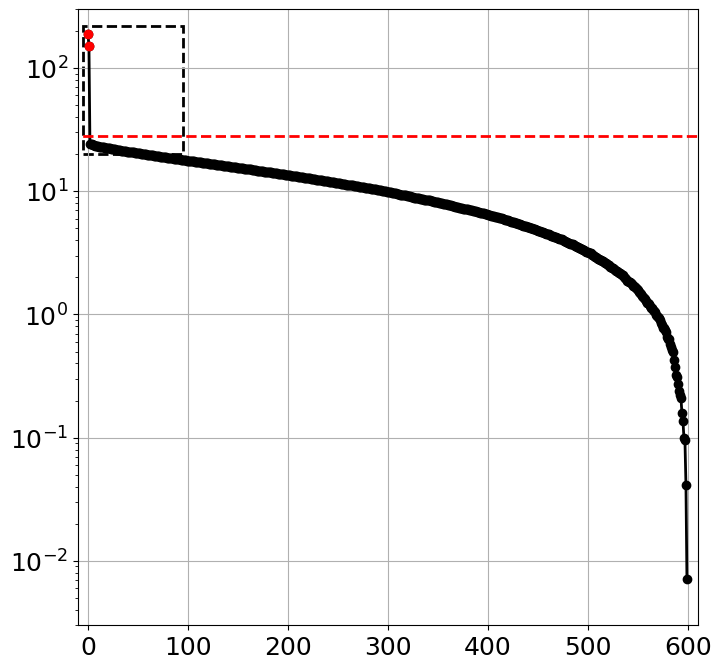

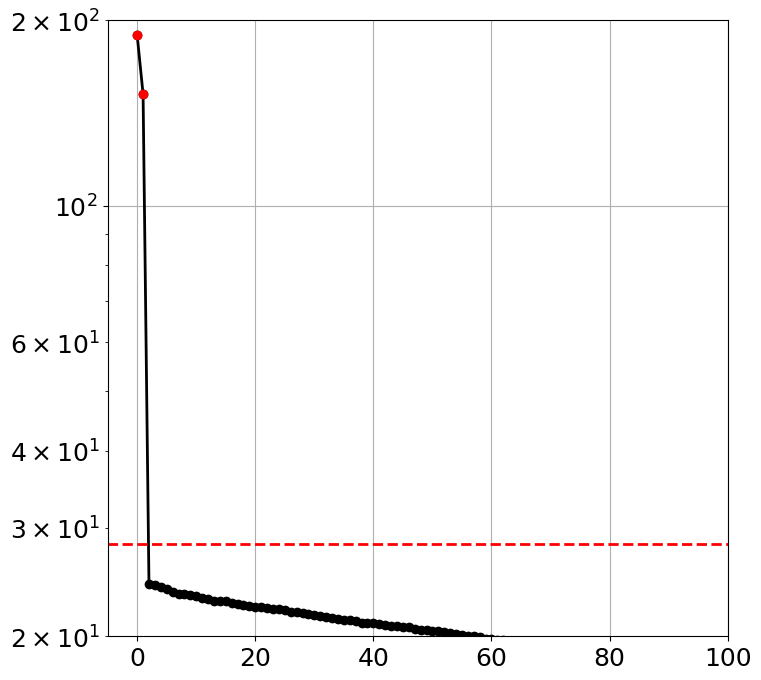

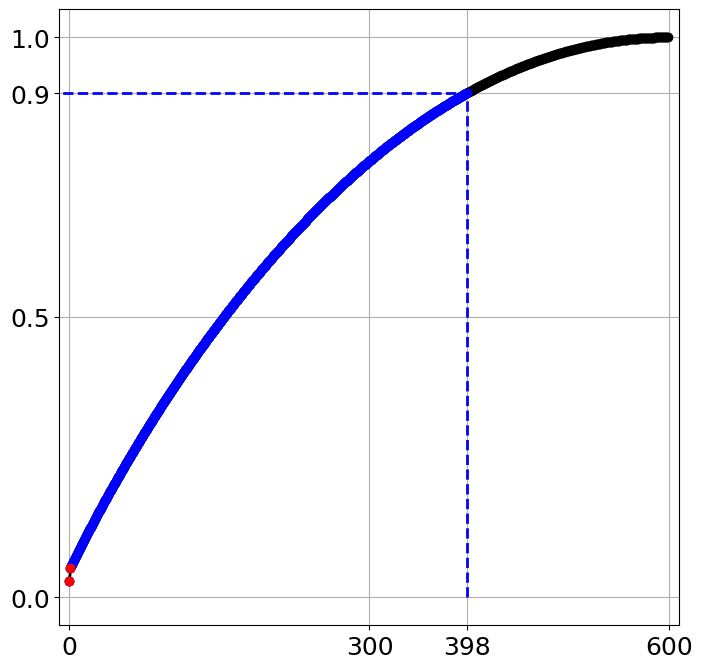

In [256]:
## Compare optimal truncation with ad-hoc

fig1,ax1 = plt.subplots(1)

ax1.semilogy(S,'-o', color='k', linewidth=2)
ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', linewidth=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', linewidth=2)
rect = patches.Rectangle((-5,20),100,200,linewidth=2,linestyle='--',facecolor='none',edgecolor='k')
ax1.add_patch(rect)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.grid()
plt.show()

fig2,ax2 = plt.subplots(1)

ax2.semilogy(S,'-o', color='k', linewidth=2)
ax2.semilogy(np.diag(S[:(r+1)]),'o', color='r', linewidth=2)
ax2.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', linewidth=2)
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()

fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,'-o',color='k',linewidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',linewidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',linewidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',linewidth=2)

ax3.grid()
plt.show()